In [7]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats

In [ ]:
# Load the 'tips' dataset from Seaborn
tips = sns.load_dataset("tips")

In [2]:
# Sample Mean
sample_mean = tips['total_bill'].mean()
print(f"Sample Mean of 'total_bill': {sample_mean:.2f}")

# Sample Standard Deviation
sample_std = tips['total_bill'].std()
print(f"Sample Standard Deviation of 'total_bill': {sample_std:.2f}")

# Sample Variance
sample_var = tips['total_bill'].var()
print(f"Sample Variance of 'total_bill': {sample_var:.2f}")

'''
taking example of
print(f"Sample Mean of 'total_bill': {sample_mean:.2f}")
Using print statement to show the mean of total bills using f string
.2f will strict the answer to give a decimal with 2 precision (2 numbers after the decimal point)

If we use
print("Sample mean of total bills",sample_mean) -- OUTPUT: Sample Mean of 'total_bill': 19.785942622950824
'''

Sample Mean of 'total_bill': 19.785942622950824
Sample Standard Deviation of 'total_bill': 8.90
Sample Variance of 'total_bill': 79.25


In [3]:
# Descriptive Statistics
desc_stats = tips['total_bill'].describe()
print("Descriptive Statistics of 'total_bill':")
print(desc_stats)
# Descriptive stats of column - total bill

Descriptive Statistics of 'total_bill':
count    244.000000
mean      19.785943
std        8.902412
min        3.070000
25%       13.347500
50%       17.795000
75%       24.127500
max       50.810000
Name: total_bill, dtype: float64


In [12]:
tips.describe() 
# Descriptive stats of entire dataset except object datatype

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [8]:
# Covariance and Correlation
cov_matrix = tips.cov() 

correlation_matrix = tips.corr()

print("Covariance Matrix:")
print(cov_matrix)
print("\nCorrelation Matrix:")
print(correlation_matrix)

Covariance Matrix:
            total_bill       tip      size
total_bill   79.252939  8.323502  5.065983
tip           8.323502  1.914455  0.643906
size          5.065983  0.643906  0.904591

Correlation Matrix:
            total_bill       tip      size
total_bill    1.000000  0.675734  0.598315
tip           0.675734  1.000000  0.489299
size          0.598315  0.489299  1.000000


<Axes: >

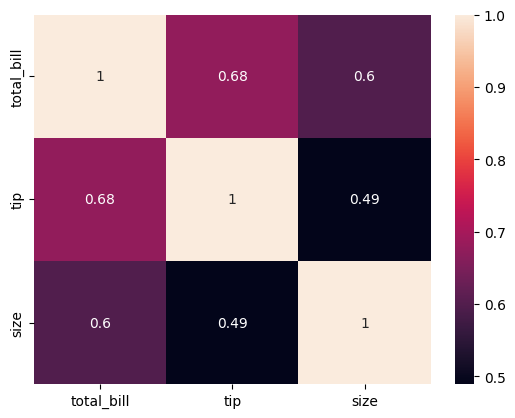

In [10]:
correlation = tips.corr() 
sns.heatmap(correlation, annot=True)
# giving the correlation matrix as a data for the heatmap
# annot=True : to show the data values inside the box

Text(0, 0.5, 'Frequency')

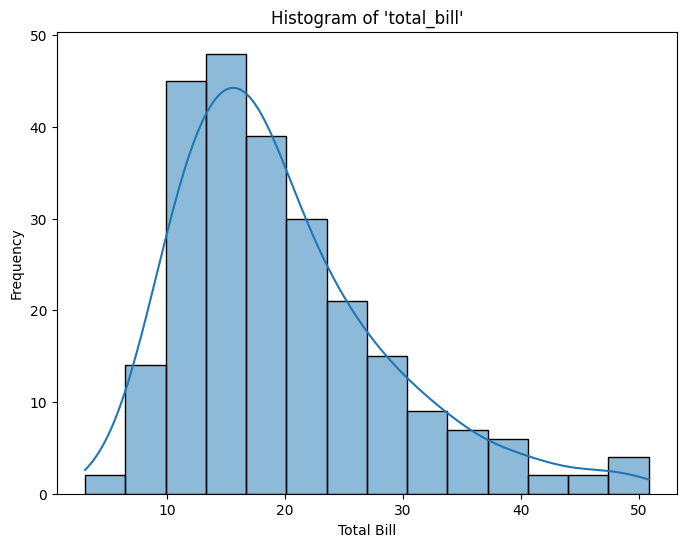

In [4]:
# Histogram
plt.figure(figsize=(8, 6))
# set the size of the graph

sns.histplot(tips['total_bill'], kde=True)
# histogram shows distribution of one variable -- here considering total_bill column
# kde=True : kde smooths the distribution & gives the line graph of the distribution

plt.title("Histogram of 'total_bill'")
plt.xlabel("Total Bill")
plt.ylabel("Frequency")

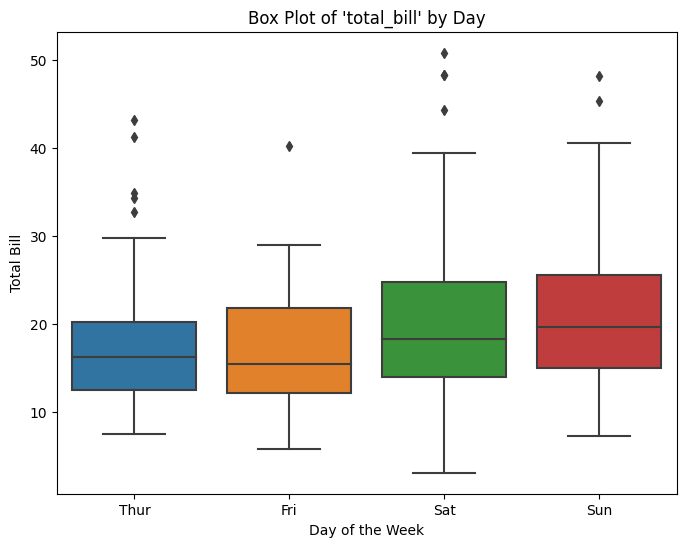

In [5]:
# Box Plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='day', y='total_bill', data=tips)
plt.title("Box Plot of 'total_bill' by Day")
plt.xlabel("Day of the Week")
plt.ylabel("Total Bill")

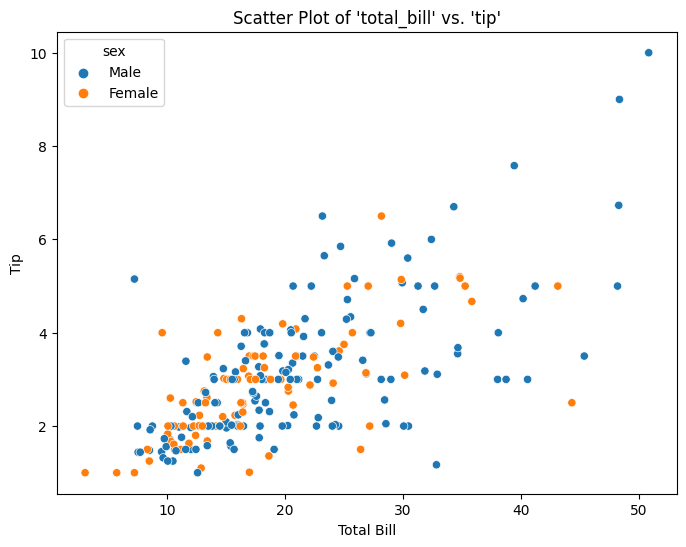

In [6]:
# Scatter Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='total_bill', y='tip', data=tips, hue='sex')
# hue: to show the variation between gender/ legend

plt.title("Scatter Plot of 'total_bill' vs. 'tip'")
plt.xlabel("Total Bill")
plt.ylabel("Tip")
plt.show()

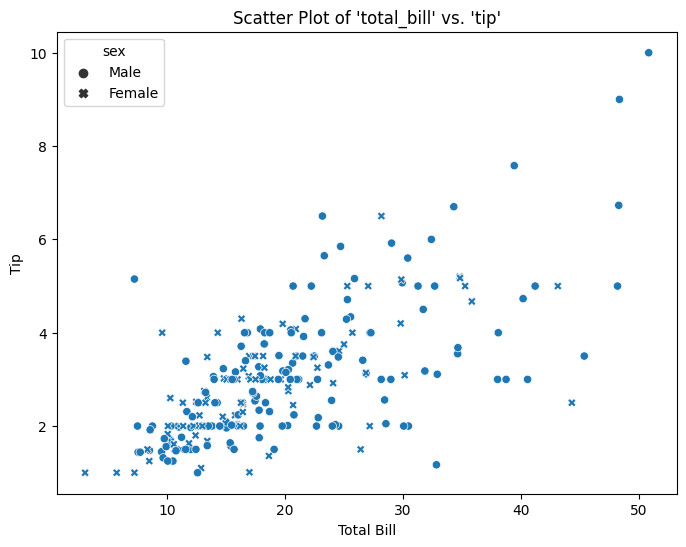

In [6]:
# Scatter Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='total_bill', y='tip', data=tips, style='sex')
# style: to show the variation between gender/ legend

plt.title("Scatter Plot of 'total_bill' vs. 'tip'")
plt.xlabel("Total Bill")
plt.ylabel("Tip")
plt.show()

# Using z score to find outliers 

In [9]:
# Load the dataset (replace 'data' with your dataset)
data = pd.DataFrame({
    'Value': [10, 12, 8, 14, 20, 16, 25, 22, 30, 35, 40, 100]})

In [12]:
# Calculate the Z-scores
data['Z_Score'] = np.abs(stats.zscore(data['Value']))
print(data['Z_Score'])

0     0.741676
1     0.657713
2     0.825639
3     0.573749
4     0.321859
5     0.489786
6     0.111951
7     0.237896
8     0.097957
9     0.307865
10    0.517774
11    3.036673
Name: Z_Score, dtype: float64


In [14]:
# Define a threshold (e.g., Z-score > 2 is considered an outlier)
threshold = 2

# Identify and visualize the outliers
outliers = data[data['Z_Score'] > threshold]
print(outliers)

    Value   Z_Score
11    100  3.036673


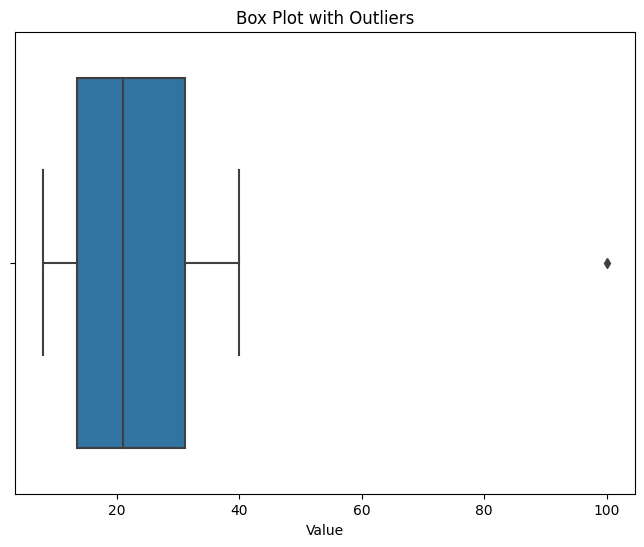

Outliers:
    Value   Z_Score
11    100  3.036673


In [16]:
# Create a box plot to visualize the outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['Value'])
plt.title("Box Plot with Outliers")

# Display the outliers
print("Outliers:")
print(outliers)

# finding outliers using IQR 

In [20]:
Q1 = data['Value'].quantile(0.25)
Q3 = data['Value'].quantile(0.75)
IQR = Q3 - Q1
print('Q1:',Q1)
print('Q3:',Q3)
print('IQR:',IQR)

Q1: 13.5
Q3: 31.25
IQR: 17.75


In [22]:
threshold = 1.5
# Define a threshold (e.g., 1.5 times IQR)

In [24]:
lower_bound = Q1 - threshold * IQR
upper_bound = Q3 + threshold * IQR

outliers = data[(data['Value'] < lower_bound) | (data['Value'] > upper_bound)]

print('lower bound:',lower_bound)
print('upper_bound:',upper_bound)
print('Outliers:', outliers)

lower bound: -13.125
upper_bound: 57.875
Outliers:     Value   Z_Score
11    100  3.036673


Text(0.5, 1.0, 'Box Plot with Outliers')

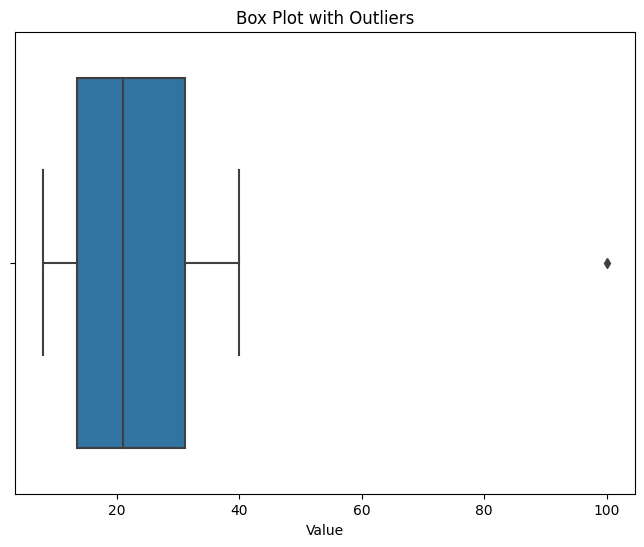

In [25]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['Value'])
plt.title("Box Plot with Outliers")

# t-test 

t-test to check if there is a significant difference in the total bill amounts between lunch and dinner

In [26]:
lunch_data = tips[tips["time"] == "Lunch"]["total_bill"]
dinner_data = tips[tips["time"] == "Dinner"]["total_bill"]

# Split the data into lunch and dinner groups

In [28]:
t_statistic, p_value = stats.ttest_ind(lunch_data, dinner_data)

print('t-stat:', t_statistic)
print('p value:', p_value)

# Perform a t-test to compare the means of the two groups
# stats.ttest_ind : module for performing a two-sample t-test 
'''This function is used to test if there is a significant difference between the means of two independent groups, 
in this case, "lunch_data" and "dinner_data.'''

t-stat: -2.8976375218366424
p value: 0.004104621407595674


In [31]:
# Define the significance level (alpha)
alpha = 0.05

In [35]:
if p_value < alpha:
    print("There is a significant difference between lunch and dinner total bills.")
else:
    print("There is no significant difference between lunch and dinner total bills.")

There is a significant difference between lunch and dinner total bills.


# f-test

To examine the variance between multiple groups to determine if there are significant differences

In [40]:
from scipy.stats import f_oneway

In [37]:
# Extract the total bill amounts for each day
data = [tips[tips["day"] == day]["total_bill"] for day in tips["day"].unique()]

print(data)

[0      16.99
1      10.34
2      21.01
3      23.68
4      24.59
       ...  
186    20.90
187    30.46
188    18.15
189    23.10
190    15.69
Name: total_bill, Length: 76, dtype: float64, 19     20.65
20     17.92
21     20.29
22     15.77
23     39.42
       ...  
238    35.83
239    29.03
240    27.18
241    22.67
242    17.82
Name: total_bill, Length: 87, dtype: float64, 77     27.20
78     22.76
79     17.29
80     19.44
81     16.66
       ...  
202    13.00
203    16.40
204    20.53
205    16.47
243    18.78
Name: total_bill, Length: 62, dtype: float64, 90     28.97
91     22.49
92      5.75
93     16.32
94     22.75
95     40.17
96     27.28
97     12.03
98     21.01
99     12.46
100    11.35
101    15.38
220    12.16
221    13.42
222     8.58
223    15.98
224    13.42
225    16.27
226    10.09
Name: total_bill, dtype: float64]


In [42]:
# Perform a one-way ANOVA
f_statistic, p_value = f_oneway(*data)

print('f-stat:', f_statistic)
print('p value:', p_value)

f-stat: 2.7674794432863363
p value: 0.04245383328952047


In [44]:
# Define the significance level (alpha)
alpha = 0.05

In [45]:
# Check if the p-value is less than alpha to determine significance
if p_value < alpha:
    print("There is a significant difference in total bills between the days of the week.")
else:
    print("There is no significant difference in total bills between the days of the week.")

There is a significant difference in total bills between the days of the week.


# Pearson correlation 

In [47]:
# Calculate Pearson correlation
pearson_corr = tips["total_bill"].corr(tips["tip"], method="pearson")

print("Pearson Correlation:", pearson_corr)

Pearson Correlation: 0.6757341092113641


# Spearman correlation 

In [49]:
# Calculate Spearman correlation
spearman_corr = tips["total_bill"].corr(tips["tip"], method="spearman")

print("Spearman Correlation:", spearman_corr)

Spearman Correlation: 0.6789681219001009


# ANOVA

ANOVA is used to compare means across multiple groups or factors to determine if there are statistically significant differences between them. In this example, we will conduct a one-way ANOVA to check if there is a significant difference in total bill amounts between different days of the week.

In [51]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [52]:
model = ols('total_bill ~ day', data=tips).fit()

'''
This part defines the linear regression model. 
It uses the ols function (Ordinary Least Squares) from the statsmodels library to specify the model

 "total_bill" (dependent variable) based on the "day" (independent variable)

'''

'\nThis part defines the linear regression model. \nIt uses the ols function (Ordinary Least Squares) from the statsmodels library to specify the model\n\n "total_bill" (dependent variable) based on the "day" (independent variable)\n\n'

In [53]:
# Perform the ANOVA
anova_table = sm.stats.anova_lm(model, typ=2)

''' "Typ=2" represents Type II sum of squares in ANOVA, which is suitable for testing the effect of 
each factor (day) while accounting for other factors'''

In [54]:
# Print the ANOVA table
print(anova_table)

                sum_sq     df         F    PR(>F)
day         643.941362    3.0  2.767479  0.042454
Residual  18614.522721  240.0       NaN       NaN
